# Buisness Goal

Identify patterns in customer purchasing behavior to improve customer retention and increase average basket size.


We’ll assume our main goal is:

             📌 "Build customer segments to enable personalized marketing and retention strategies."

# Step 1: Gather Data



In [1]:
from google.colab import files
files.upload()     # for kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!pip install -q kaggle
!kaggle datasets download -d carrie1/ecommerce-data     # getting the data from source

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown
  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 602MB/s]


In [5]:
!unzip -q ecommerce-data.zip    # unzipping the data

In [6]:
# import data into a csv

import pandas as pd
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
# Basic structure
df.shape

(541909, 8)

In [10]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [12]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Step 2: Understanding the data & Initial Cleaning

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# Drop rows with missing CustomerID
df = df[df['CustomerID'].notnull()]

In [16]:
# Filter out cancellations (InvoiceNo starting with "C")
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [17]:
# Remove rows with non-positive quantities or unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [18]:
# Drop exact duplicates
df = df.drop_duplicates()

In [19]:
# Add derived monetary amount
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [20]:
# Check the cleaned data
print(df.shape)
print(df.describe())

(392692, 9)
            Quantity      UnitPrice     CustomerID         Amount
count  392692.000000  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914   15287.843865      22.631500
std       180.492832      22.241836    1713.539549     311.099224
min         1.000000       0.001000   12346.000000       0.001000
25%         2.000000       1.250000   13955.000000       4.950000
50%         6.000000       1.950000   15150.000000      12.450000
75%        12.000000       3.750000   16791.000000      19.800000
max     80995.000000    8142.750000   18287.000000  168469.600000


# Step 3: EDA

Explore the data from three perspectives: product-level, time-level, and customer-level.

StockCode
23843     80995
23166     77916
84077     54319
22197     49160
85099B    46078
85123A    36763
84879     35263
21212     33670
23084     27153
22492     26076
Name: Quantity, dtype: int64


<Axes: >

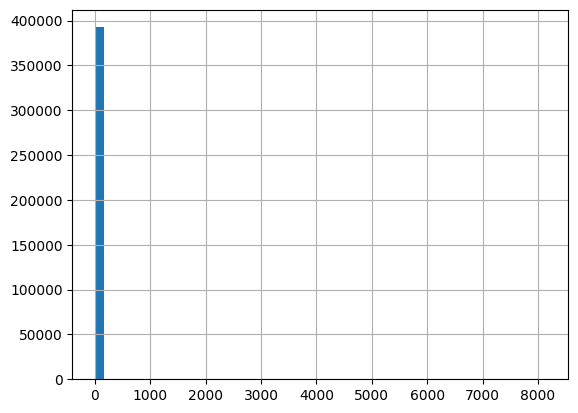

In [21]:
# product level

# Top 10 selling products
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Distribution of unit prices
df['UnitPrice'].hist(bins=50)

<Axes: title={'center': 'Sales by Hour'}, xlabel='Hour'>

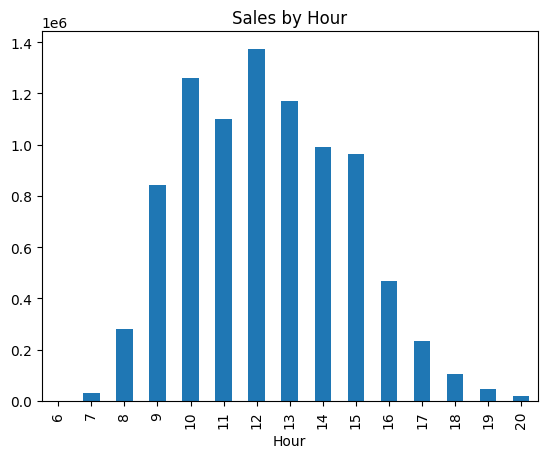

In [22]:
# time level EDA

# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sales over time (by day)
daily_sales = df.set_index('InvoiceDate').resample('D')['Amount'].sum()
daily_sales.plot(title="Daily Sales Amount")

# Orders by hour of day
df['Hour'] = df['InvoiceDate'].dt.hour
df.groupby('Hour')['Amount'].sum().plot(kind='bar', title="Sales by Hour")


Unique Customers: 4338


<Axes: >

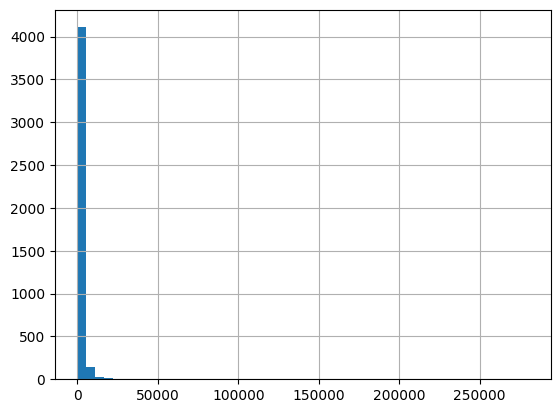

In [23]:
# customer level

# Number of customers
print("Unique Customers:", df['CustomerID'].nunique())

# Spend per customer
cust_spend = df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False)
cust_spend.hist(bins=50)

# Step 4: Feature Engineering

Transform the dataset to a customer-level structure, one row per customer, with features summarizing their behavior.

In [24]:
from datetime import datetime

# Use the max date in dataset as reference point
reference_date = df['InvoiceDate'].max()

# Group by CustomerID
customer_df = df.groupby('CustomerID').agg(
    TotalOrders=('InvoiceNo', 'nunique'),
    TotalQuantity=('Quantity', 'sum'),
    TotalSpent=('Amount', 'sum'),
    FirstPurchase=('InvoiceDate', 'min'),
    LastPurchase=('InvoiceDate', 'max'),
    UniqueProducts=('StockCode', 'nunique'),
    AvgUnitPrice=('UnitPrice', 'mean'),
    AvgBasketSize=('Quantity', lambda x: x.sum() / x.nunique())  # avg qty per invoice
).reset_index()


In [26]:
# new df

customer_df.head()

,CustomerID,TotalOrders,TotalQuantity,TotalSpent,FirstPurchase,LastPurchase,UniqueProducts,AvgUnitPrice,AvgBasketSize
0,12346.0,1,74215,77183.60,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,74215.000000
1,12347.0,7,2458,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00,103,2.644011,163.866667
2,12348.0,4,2341,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,22,5.764839,234.100000
3,12349.0,1,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,73,8.289041,52.583333
4,12350.0,1,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,17,3.841176,39.400000


In [27]:
# Add derived features
customer_df['RecencyDays'] = (reference_date - customer_df['LastPurchase']).dt.days
customer_df['TenureDays'] = (customer_df['LastPurchase'] - customer_df['FirstPurchase']).dt.days


In [28]:
# Final shape
print(customer_df.shape)

(4338, 11)


In [30]:
customer_df.head()

,CustomerID,TotalOrders,TotalQuantity,TotalSpent,FirstPurchase,LastPurchase,UniqueProducts,AvgUnitPrice,AvgBasketSize,RecencyDays,TenureDays
0,12346.0,1,74215,77183.60,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1.040000,74215.000000,325,0
1,12347.0,7,2458,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00,103,2.644011,163.866667,1,365
2,12348.0,4,2341,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,22,5.764839,234.100000,74,282
3,12349.0,1,631,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,73,8.289041,52.583333,18,0
4,12350.0,1,197,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,17,3.841176,39.400000,309,0


Evaluating and keep the most meaningful features (based on variance, correlation, or business logic)

In [32]:
# Basic correlation check
customer_df.corr(numeric_only=True)

,CustomerID,TotalOrders,TotalQuantity,TotalSpent,UniqueProducts,AvgUnitPrice,AvgBasketSize,RecencyDays,TenureDays
CustomerID,1.000000,-0.010971,-0.021162,-0.013822,-0.008358,0.021783,-0.021604,0.007631,-0.006876
TotalOrders,-0.010971,1.000000,0.557216,0.552780,0.692223,-0.010771,0.045942,-0.260578,0.476560
TotalQuantity,-0.021162,0.557216,1.000000,0.922942,0.408819,-0.005070,0.383797,-0.123449,0.228579
TotalSpent,-0.013822,0.552780,0.922942,1.000000,0.385826,0.013402,0.311541,-0.121831,0.225374
UniqueProducts,-0.008358,0.692223,0.408819,0.385826,1.000000,-0.028277,0.021691,-0.300728,0.458102
AvgUnitPrice,0.021783,-0.010771,-0.005070,0.013402,-0.028277,1.000000,0.000517,0.017353,-0.027945
AvgBasketSize,-0.021604,0.045942,0.383797,0.311541,0.021691,0.000517,1.000000,0.007571,0.021603
RecencyDays,0.007631,-0.260578,-0.123449,-0.121831,-0.300728,0.017353,0.007571,1.000000,-0.513562
TenureDays,-0.006876,0.476560,0.228579,0.225374,0.458102,-0.027945,0.021603,-0.513562,1.000000


In [33]:
# Manual filtering
features_to_keep = [
    'CustomerID',
    'TotalOrders',
    'TotalQuantity',
    'TotalSpent',
    'AvgBasketSize',
    'UniqueProducts',
    'RecencyDays',
    'TenureDays'
]
final_customer_df = customer_df[features_to_keep]


In [35]:
final_customer_df.head()

,CustomerID,TotalOrders,TotalQuantity,TotalSpent,AvgBasketSize,UniqueProducts,RecencyDays,TenureDays
0,12346.0,1,74215,77183.60,74215.000000,1,325,0
1,12347.0,7,2458,4310.00,163.866667,103,1,365
2,12348.0,4,2341,1797.24,234.100000,22,74,282
3,12349.0,1,631,1757.55,52.583333,73,18,0
4,12350.0,1,197,334.40,39.400000,17,309,0


# Step 5:Segmentation

compute RFM Scores

In [36]:
# RFM Base
rfm = customer_df[['CustomerID', 'RecencyDays', 'TotalOrders', 'TotalSpent']].copy()
rfm.rename(columns={
    'TotalOrders': 'Frequency',
    'TotalSpent': 'Monetary',
    'RecencyDays': 'Recency'
}, inplace=True)

# Assign quintile scores (1 = worst, 5 = best)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Combine into RFM segment
rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)


In [37]:
def rfm_label(row):
    if row['R_score'] == 5 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Champions'
    elif row['R_score'] >= 4 and row['F_score'] >= 3:
        return 'Loyal'
    elif row['R_score'] <= 2 and row['F_score'] >= 4:
        return 'At Risk'
    elif row['R_score'] == 5 and row['F_score'] <= 2:
        return 'New Customers'
    elif row['R_score'] <= 2 and row['F_score'] <= 2:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_label, axis=1)


In [38]:
print(rfm['Segment'].value_counts())

Segment
Others           1446
Lost             1065
Loyal             898
Champions         555
At Risk           275
New Customers      99
Name: count, dtype: int64


Clustering

In [39]:
# nomalize features

from sklearn.preprocessing import StandardScaler

X_kmeans = customer_df[[
    'RecencyDays', 'TotalOrders', 'TotalSpent',
    'AvgBasketSize', 'UniqueProducts', 'TenureDays'
]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)


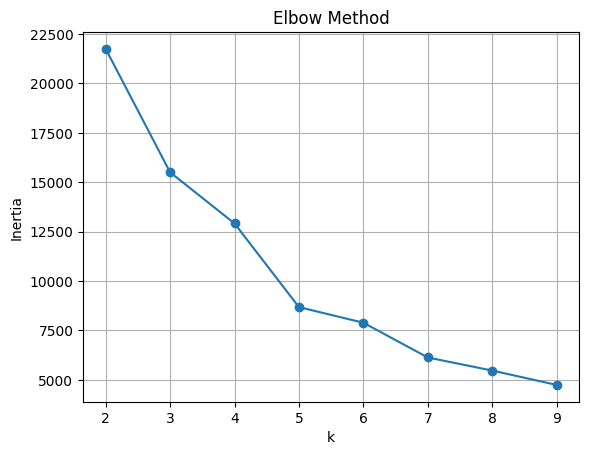

In [40]:
# find k optimal (elbow method)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [41]:
# Final model
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Insights Gen

### Avg basket size by Group

In [43]:
customer_df.groupby('Cluster')['AvgBasketSize'].mean()

,AvgBasketSize
Cluster,
0,61.988449
1,57356.750000
2,119.986385
3,50.787334
4,1097.005992


In [44]:
rfm.groupby('Segment')['CustomerID'].count()

,CustomerID
Segment,
At Risk,275
Champions,555
Lost,1065
Loyal,898
New Customers,99
Others,1446


### Product Preference

In [46]:
# Join clusters/RFM back to original data
df_seg = df.merge(rfm[['CustomerID', 'Segment']], on='CustomerID')
df_km = df.merge(customer_df[['CustomerID', 'Cluster']], on='CustomerID')

# Top 5 products per segment
top_by_segment = df_seg.groupby(['Segment', 'StockCode'])['Quantity'].sum().sort_values(ascending=False).groupby(level=0).head(5)
top_by_segment

Segment        StockCode
Loyal          23843        80995
Lost           23166        74404
Champions      84077        31271
               22197        29415
               85099B       26247
               85123A       18677
               21212        15650
Loyal          84879        13809
               17003        13340
Others         16014        11570
Loyal          22197        10955
               23084         9681
Others         22693         7683
               85099B        7646
               85123A        7539
               84077         7157
At Risk        21212         5512
Lost           84077         4944
               22197         4676
At Risk        21213         3818
               21975         3721
               84992         3585
               21977         3507
Lost           15036         3200
               21212         2323
New Customers  23582         1534
               22413         1414
               22319          312
               16045          300
               85099C         222
Name: Quantity, dtype: int64

### Returns

In [58]:
df_raw = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [59]:
# extract the returns only

df_returns = df_raw[df_raw['InvoiceNo'].astype(str).str.startswith('C')].copy()
df_returns = df_returns[df_returns['CustomerID'].notnull()]
df_returns['CustomerID'] = df_returns['CustomerID'].astype(int)

In [61]:
df_returns.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom


In [63]:
# merge with rfm segments and k means

df_returns_rfm = df_returns.merge(rfm[['CustomerID', 'Segment']], on='CustomerID', how='left')

In [64]:
df_returns_km = df_returns.merge(customer_df[['CustomerID', 'Cluster']], on='CustomerID', how='left')

In [66]:
# return behavior

# For RFM
returns_by_segment = df_returns_rfm.groupby('Segment')['InvoiceNo'].nunique().sort_values(ascending=False)
print("Returns by RFM Segment:\n", returns_by_segment)

Returns by RFM Segment:
 Segment
Champions        1523
Loyal             916
Others            715
At Risk           234
Lost              218
New Customers      12
Name: InvoiceNo, dtype: int64


In [67]:
# For KMeans
returns_by_cluster = df_returns_km.groupby('Cluster')['InvoiceNo'].nunique().sort_values(ascending=False)
print("Returns by KMeans Cluster:\n", returns_by_cluster)

Returns by KMeans Cluster:
 Cluster
2.0    2429
0.0     636
3.0     276
4.0     275
1.0       2
Name: InvoiceNo, dtype: int64


### Geographic Spread

<Axes: title={'center': 'Customer Segment by Country'}, xlabel='Segment'>

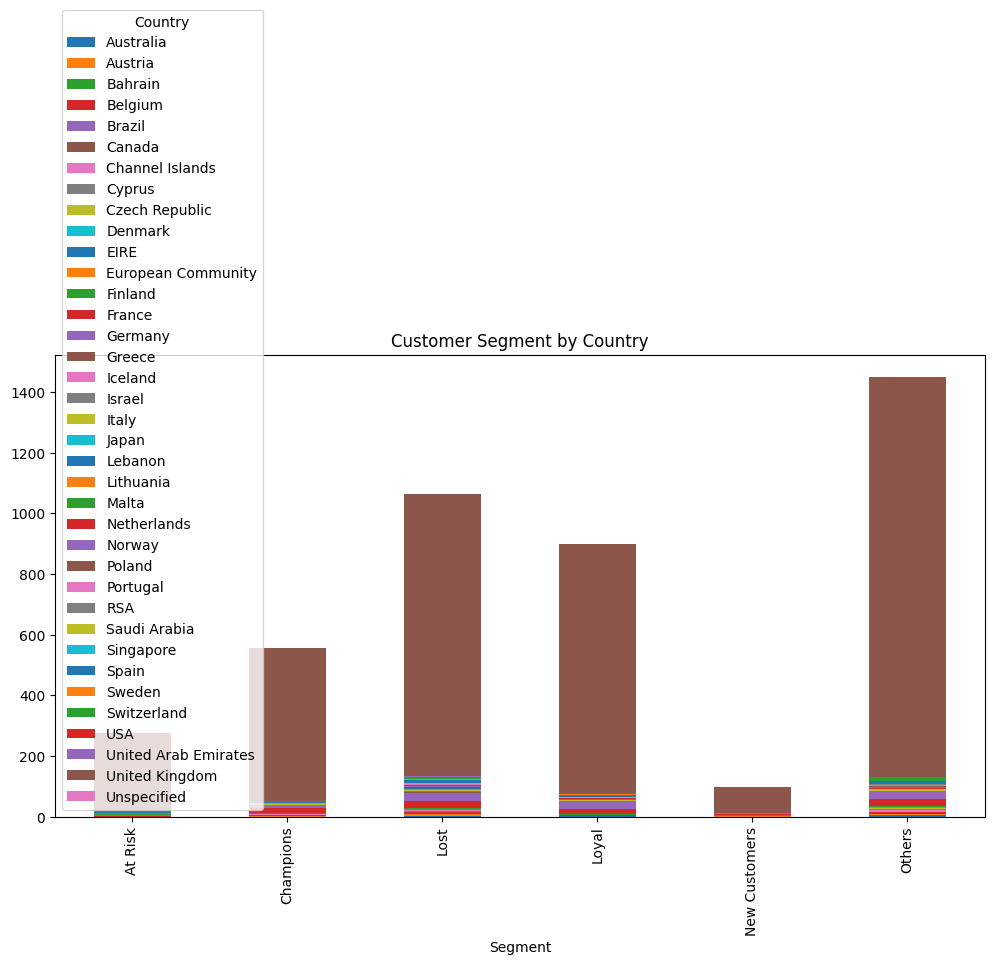

In [49]:
geo_seg = df_seg.groupby(['Segment', 'Country'])['CustomerID'].nunique().unstack().fillna(0)
geo_seg.plot(kind='bar', stacked=True, figsize=(12,6), title='Customer Segment by Country')

### Visualization

<Axes: xlabel='x', ylabel='y'>

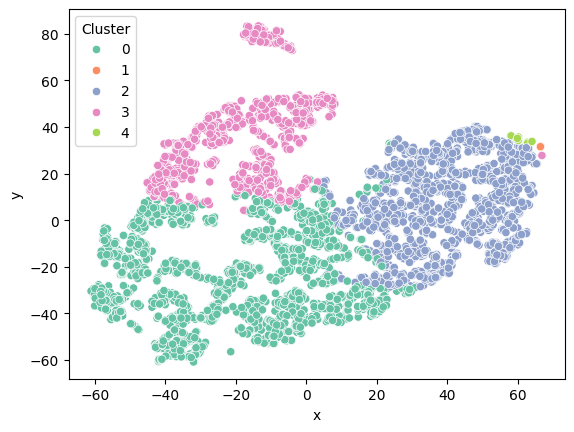

In [50]:
# t-SNE

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)

# Plot
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['Cluster'] = customer_df['Cluster']

sns.scatterplot(data=tsne_df, x='x', y='y', hue='Cluster', palette='Set2')


<Axes: xlabel='R_score', ylabel='F_score'>

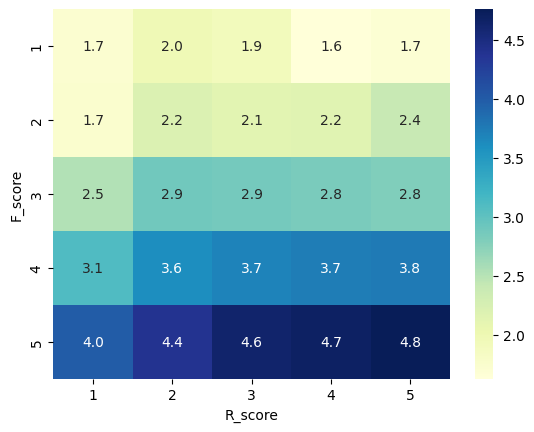

In [51]:
rfm_heatmap = rfm.pivot_table(index='F_score', columns='R_score', values='M_score', aggfunc='mean')
import seaborn as sns
sns.heatmap(rfm_heatmap, annot=True, fmt='.1f', cmap='YlGnBu')

# Buisness Recommendation & Report